In [1]:
import torch

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(root = 'data',train = True,transform = ToTensor(),download = True,)
test_data = datasets.MNIST(root = 'data',train = False,transform = ToTensor())

In [4]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [7]:
print(train_data.targets.size())

torch.Size([60000])


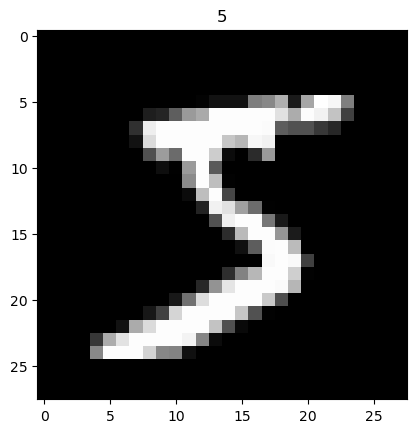

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

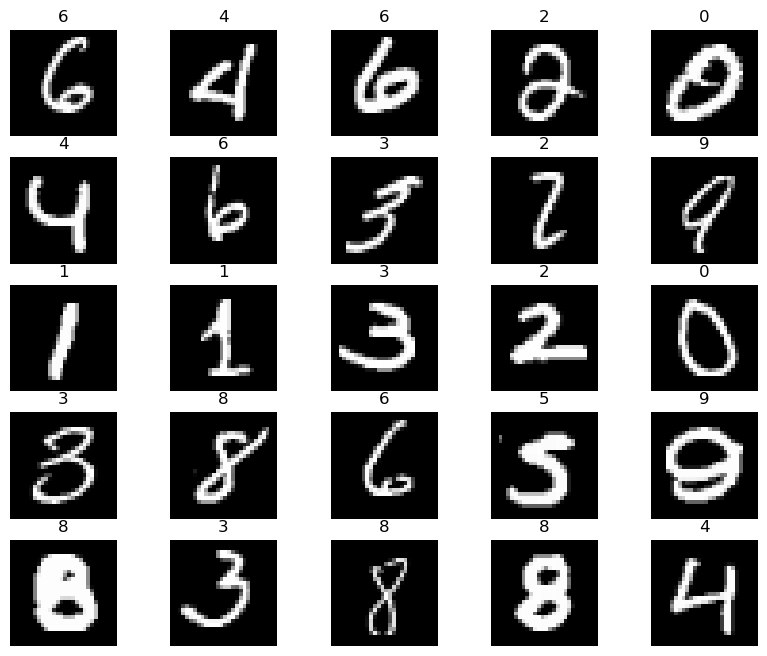

In [9]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [10]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test' : torch.utils.data.DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1209c2550>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x120ccf290>}

In [11]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output   # return x for visualization


In [12]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [13]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [14]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [15]:
from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
    cnn.train()
    
    # Train the model
    total_step = len(loaders['train'])
    
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # Gives batch data, normalize x when iterating train_loader
            b_x = Variable(images)   # Batch x
            b_y = Variable(labels)   # Batch y
            
            # Forward pass
            output = cnn(b_x)
            loss = loss_func(output, b_y)
            
            # Clear gradients for this training step   
            optimizer.zero_grad()           
            
            # Backpropagation, compute gradients 
            loss.backward()    
            
            # Apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

# Make sure you have defined your CNN model, loss function, optimizer, and loaders before calling the train function.
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1404
Epoch [1/10], Step [200/600], Loss: 0.1033
Epoch [1/10], Step [300/600], Loss: 0.0778
Epoch [1/10], Step [400/600], Loss: 0.2209
Epoch [1/10], Step [500/600], Loss: 0.0849
Epoch [1/10], Step [600/600], Loss: 0.0332
Epoch [2/10], Step [100/600], Loss: 0.0215
Epoch [2/10], Step [200/600], Loss: 0.0320
Epoch [2/10], Step [300/600], Loss: 0.0133
Epoch [2/10], Step [400/600], Loss: 0.0880
Epoch [2/10], Step [500/600], Loss: 0.0137
Epoch [2/10], Step [600/600], Loss: 0.0050
Epoch [3/10], Step [100/600], Loss: 0.0231
Epoch [3/10], Step [200/600], Loss: 0.0243
Epoch [3/10], Step [300/600], Loss: 0.0218
Epoch [3/10], Step [400/600], Loss: 0.0588
Epoch [3/10], Step [500/600], Loss: 0.0404
Epoch [3/10], Step [600/600], Loss: 0.0238
Epoch [4/10], Step [100/600], Loss: 0.0116
Epoch [4/10], Step [200/600], Loss: 0.0412
Epoch [4/10], Step [300/600], Loss: 0.1472
Epoch [4/10], Step [400/600], Loss: 0.0561
Epoch [4/10], Step [500/600], Loss: 0.0146
Epoch [4/10

In [16]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output = cnn(images)  # Removed last_layer as it's not used
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            correct += (pred_y == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total
    print('Test Accuracy of the model on the test dataset: {:.2%}'.format(accuracy))

test()


Test Accuracy of the model on the test dataset: 98.47%


In [17]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [18]:
actual_number = lbls[:10].numpy()
actual_number

array([5, 9, 5, 6, 4, 6, 1, 4, 7, 9])

In [19]:
test_output = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].numpy().squeeze()
print(f'Prediction numbers: {pred_y}')
print(f'Actual numbers: {actual_number[:10]}')

Prediction numbers: [5 9 5 6 4 6 1 4 7 9]
Actual numbers: [5 9 5 6 4 6 1 4 7 9]


In [20]:
import torch
import pandas as pd

def make_predictions_and_save(model, test_loader, output_file):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():
        for images in test_loader:
            # Assuming 'images' is a batch of test images
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())

    # Create a DataFrame from the predictions
    df = pd.DataFrame({'Prediction': predictions})

    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)
    

In [21]:
#make_predictions_and_save(cnn, loaders['test'], 'output.csv')

In [22]:
import pandas as pd
# Step 14: Make predictions on the test subset
def make_predictions(model, test_loader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for data in test_loader:
            images, _ = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for prediction in predicted:
                predictions.append(prediction.item())

    return predictions

# Make predictions on the test subset
test_predictions = make_predictions(cnn, loaders['test'])



In [23]:
# Step 10: Create a DataFrame for the predictions and save them in a CSV file
test_df = pd.DataFrame({'Prediction': test_predictions})
test_df.to_csv("Pritam_Channawar_Assignment1_DL.csv", index=False)

print("Test predictions saved to test_predictions.csv")

Test predictions saved to test_predictions.csv
